# Visual Exploratory Data Analysis -  Car Mileage

In [1]:
import numpy as np 
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline

In [64]:
mpg_df = pd.read_csv("auto-mpg.csv")  
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [65]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(mpg_df.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
mpg_df[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [66]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [70]:
median = mpg_df["horsepower"].median()
mpg_df["horsepower"].fillna(median,inplace=True)
mpg_df[mpg_df["horsepower"].isnull() == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [76]:
mpg_df['horsepower'] = mpg_df['horsepower'].astype('float64')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [77]:
#dropping/ignoring car_name 
mpg_df = mpg_df.drop('car name', axis=1)
# Also replacing the categorical var with actual values
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


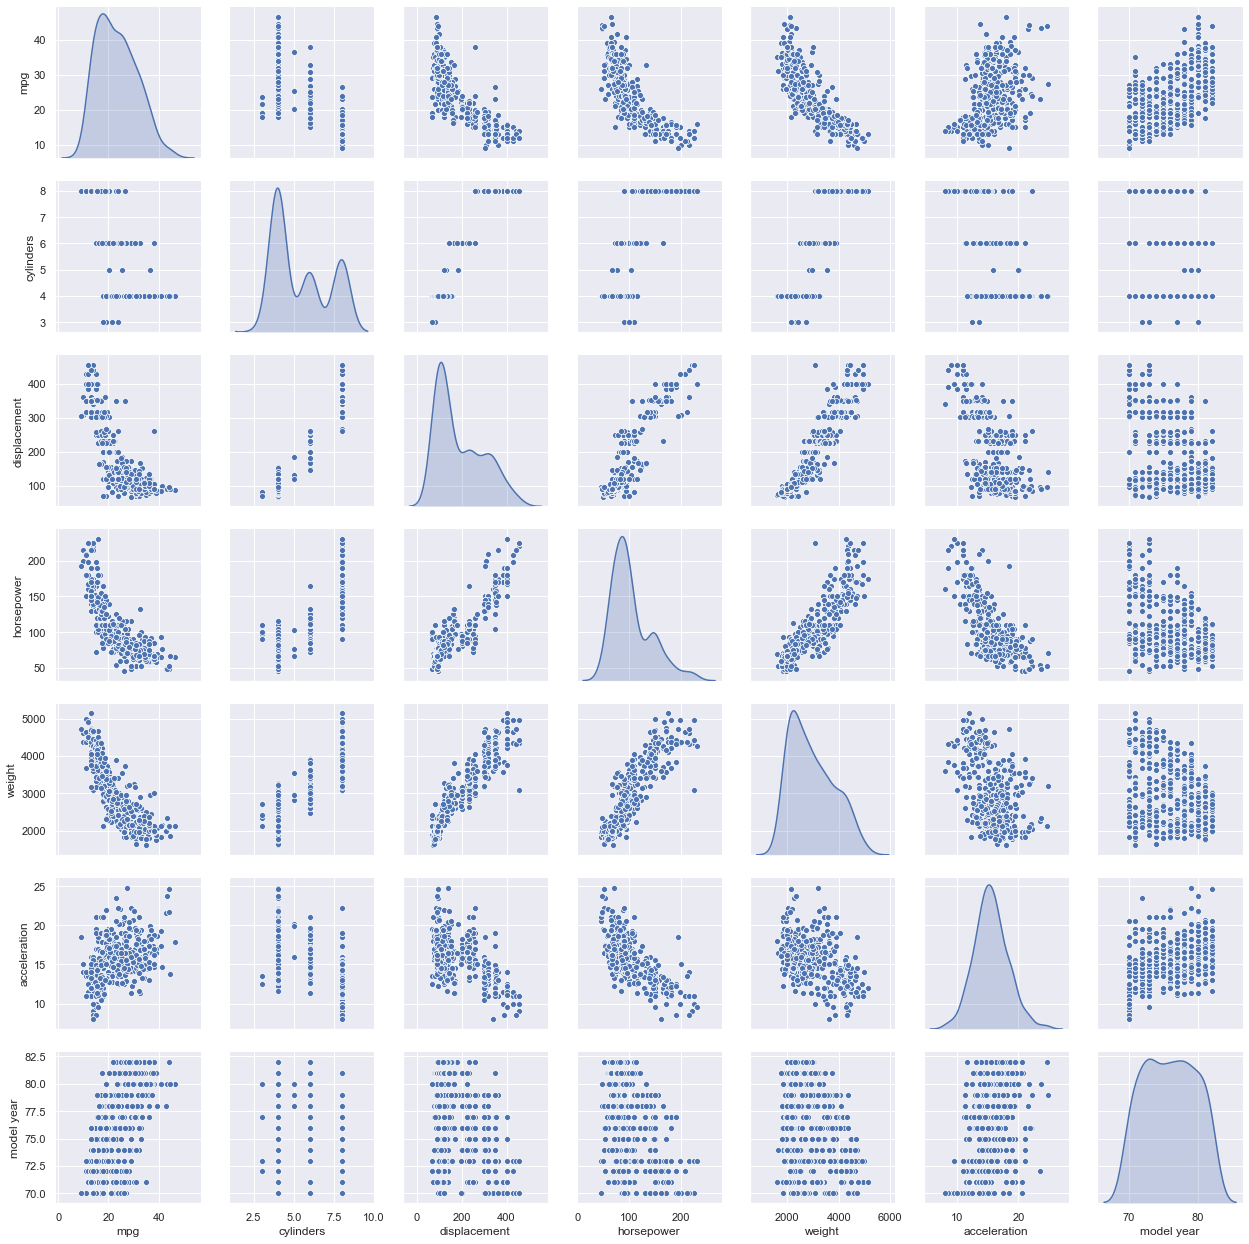

In [85]:
sns.pairplot(mpg_df, diag_kind='kde')   # to plot density curve instead of histogram on the diag
plt.show()

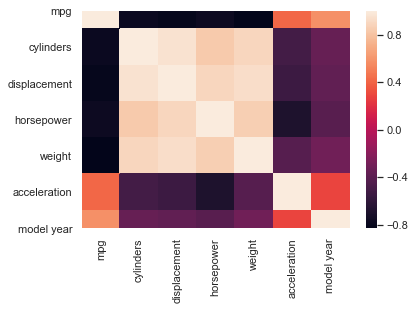

In [215]:
sns.heatmap(mpg_df.corr())
plt.show()

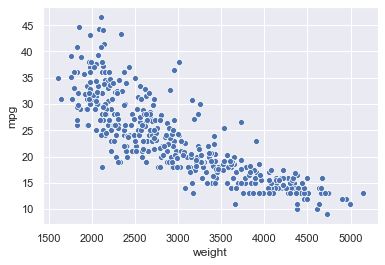

In [81]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="weight",data=mpg_df)
plt.show()

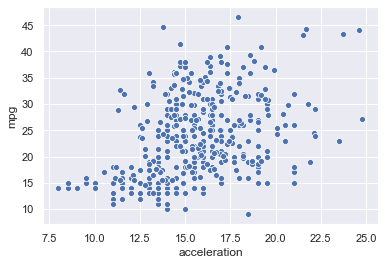

In [83]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="acceleration",data=mpg_df)
plt.show()

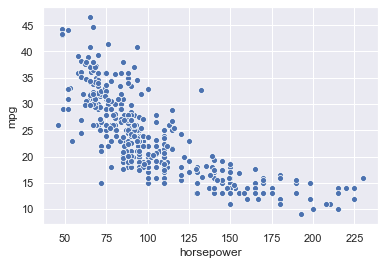

In [84]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="horsepower",data=mpg_df)
plt.show()

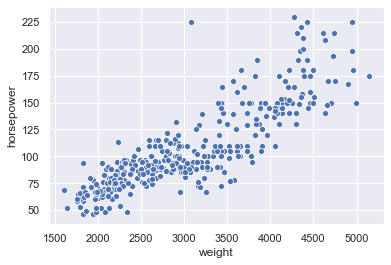

In [86]:
sns.set(style="darkgrid")
sns.scatterplot(y="horsepower",x="weight",data=mpg_df)
plt.show()

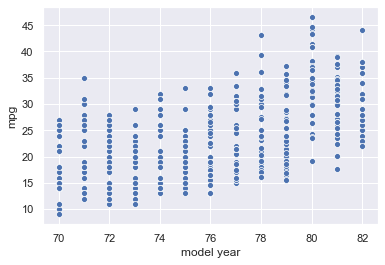

In [87]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="model year",data=mpg_df)
plt.show()

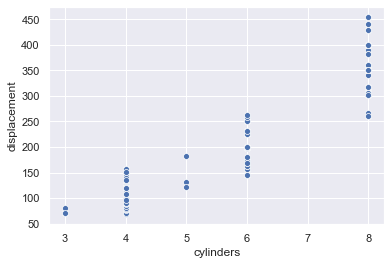

In [88]:
sns.set(style="darkgrid")
sns.scatterplot(y="displacement",x="cylinders",data=mpg_df)
plt.show()

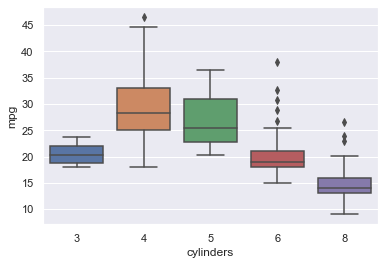

In [95]:
sns.boxplot(y="mpg",x="cylinders",data=mpg_df)
plt.show()

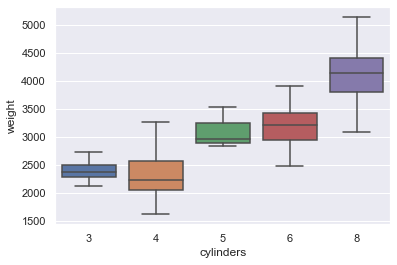

In [96]:
sns.boxplot(y="weight",x="cylinders",data=mpg_df)
plt.show()

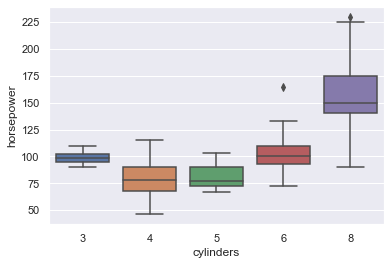

In [102]:
sns.boxplot(y="horsepower",x="cylinders",data=mpg_df)
plt.show()

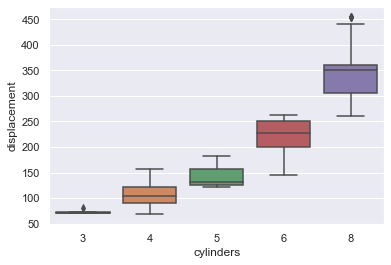

In [100]:
sns.boxplot(y="displacement",x="cylinders",data=mpg_df)
plt.show()

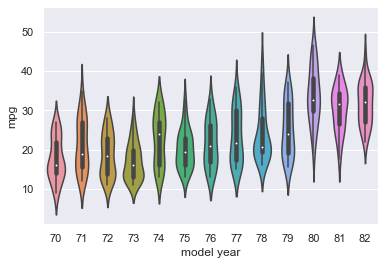

In [105]:
sns.violinplot(y="mpg",x="model year",data=mpg_df)
plt.show()

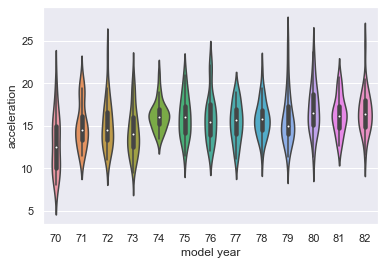

In [110]:
sns.violinplot(y="acceleration",x="model year",data=mpg_df)
plt.show()

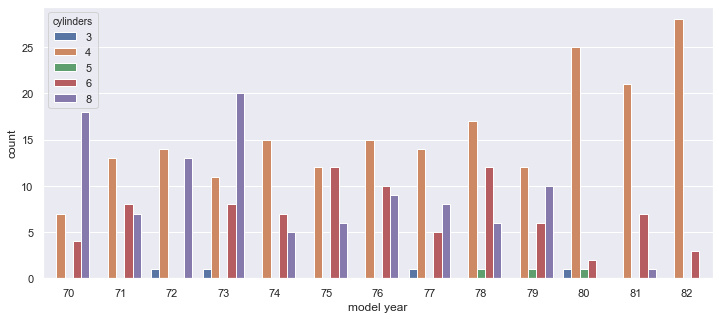

In [120]:
plt.figure(figsize=(12,5))
sns.countplot(x="model year", hue="cylinders", data=mpg_df)
plt.show()

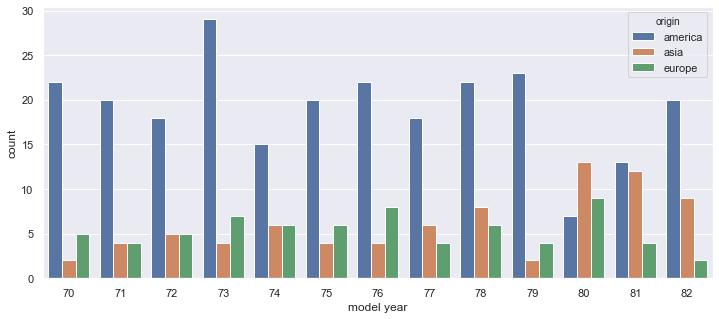

In [122]:
plt.figure(figsize=(12,5))
sns.countplot(x="model year", hue="origin", data=mpg_df)
plt.show()

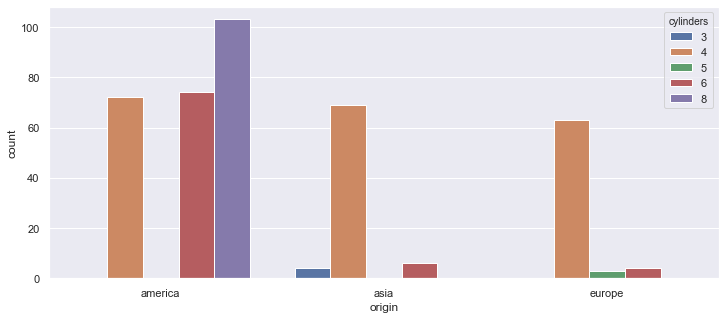

In [126]:
plt.figure(figsize=(12,5))
sns.countplot(x="origin", hue="cylinders", data=mpg_df)
plt.show()

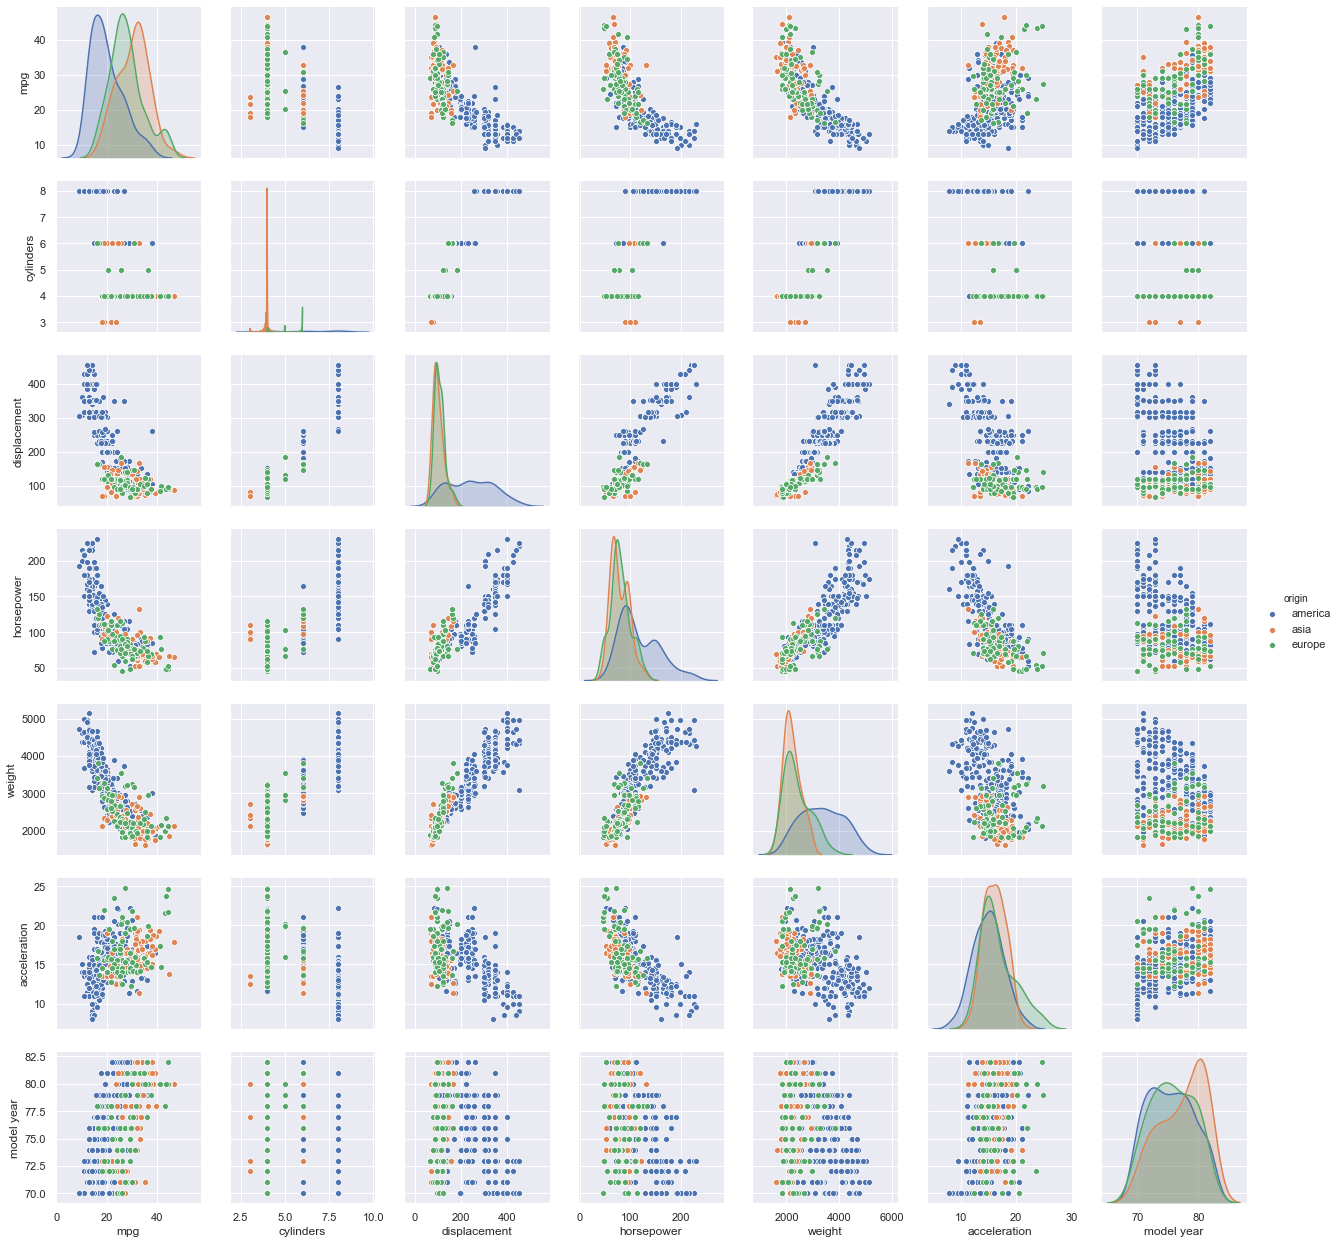

In [140]:
sns.pairplot(mpg_df, hue="origin")

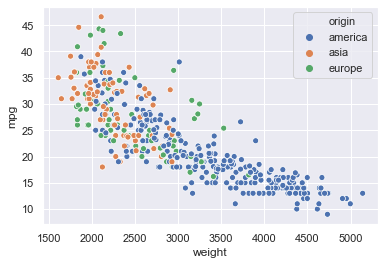

In [141]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="weight",hue="origin",data=mpg_df)
plt.show()

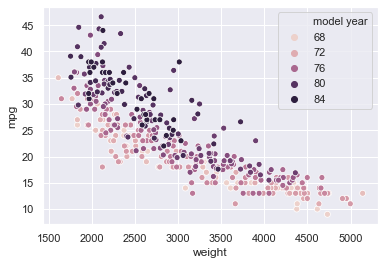

In [142]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="weight",hue="model year",data=mpg_df)
plt.show()

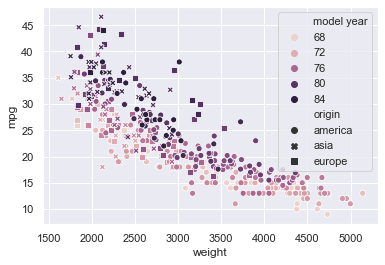

In [148]:
sns.set(style="darkgrid")
sns.scatterplot(y="mpg",x="weight",hue="model year",style="origin",data=mpg_df)
plt.show()

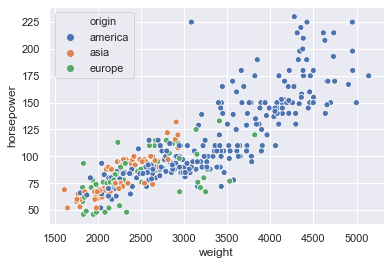

In [143]:
sns.set(style="darkgrid")
sns.scatterplot(y="horsepower",x="weight",hue="origin",data=mpg_df)
plt.show()

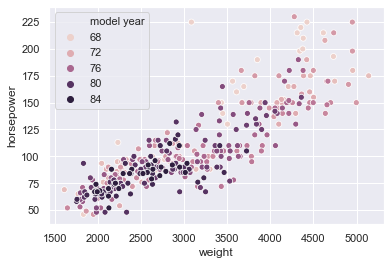

In [144]:
sns.set(style="darkgrid")
sns.scatterplot(y="horsepower",x="weight",hue="model year",data=mpg_df)
plt.show()

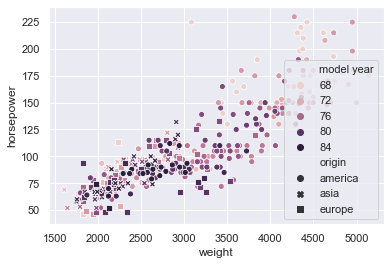

In [149]:
sns.set(style="darkgrid")
sns.scatterplot(y="horsepower",x="weight",hue="model year",style="origin",data=mpg_df)
plt.show()

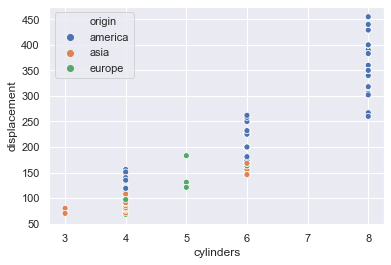

In [145]:
sns.set(style="darkgrid")
sns.scatterplot(y="displacement",x="cylinders",hue="origin",data=mpg_df)
plt.show()

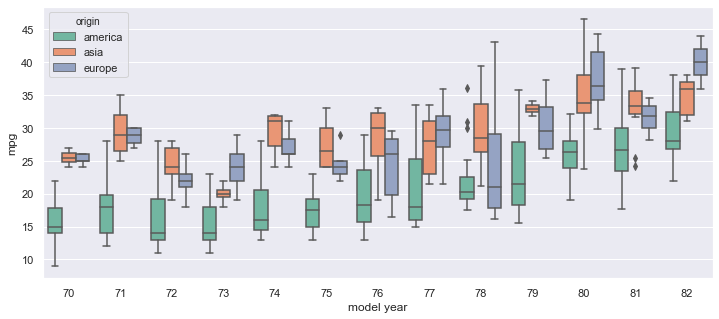

In [154]:
plt.figure(figsize=(12,5))
sns.boxplot(x="model year", y="mpg", hue="origin",data=mpg_df, palette="Set2")
plt.show()

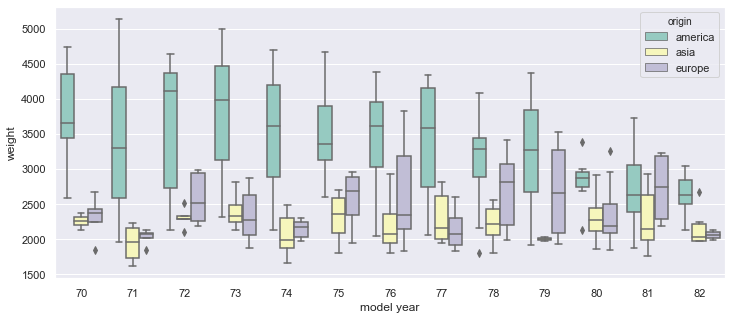

In [156]:
plt.figure(figsize=(12,5))
sns.boxplot(x="model year", y="weight", hue="origin",data=mpg_df, palette="Set3")
plt.show()

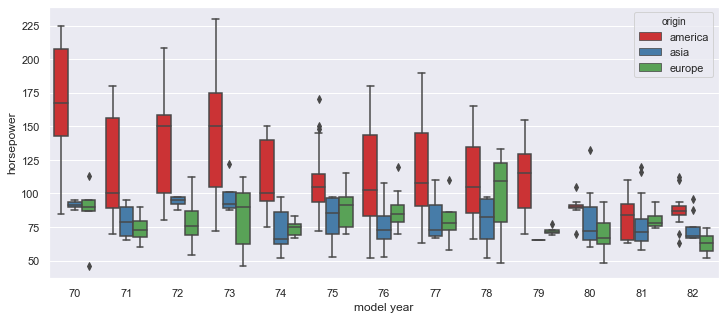

In [160]:
plt.figure(figsize=(12,5))
sns.boxplot(x="model year", y="horsepower", hue="origin",data=mpg_df, palette="Set1")
plt.show()

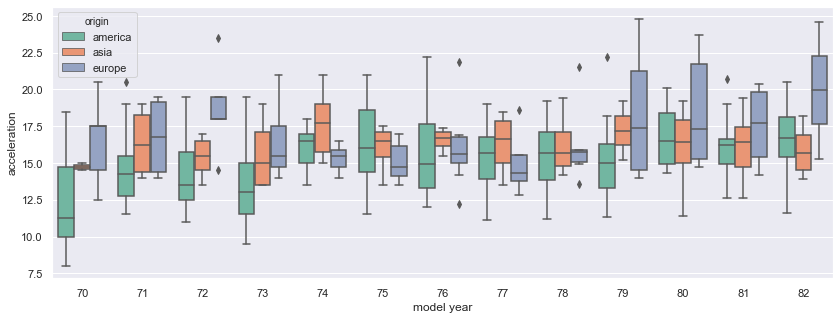

In [165]:
plt.figure(figsize=(14,5))
sns.boxplot(x="model year", y="acceleration", hue="origin",data=mpg_df, palette="Set2")
plt.show()

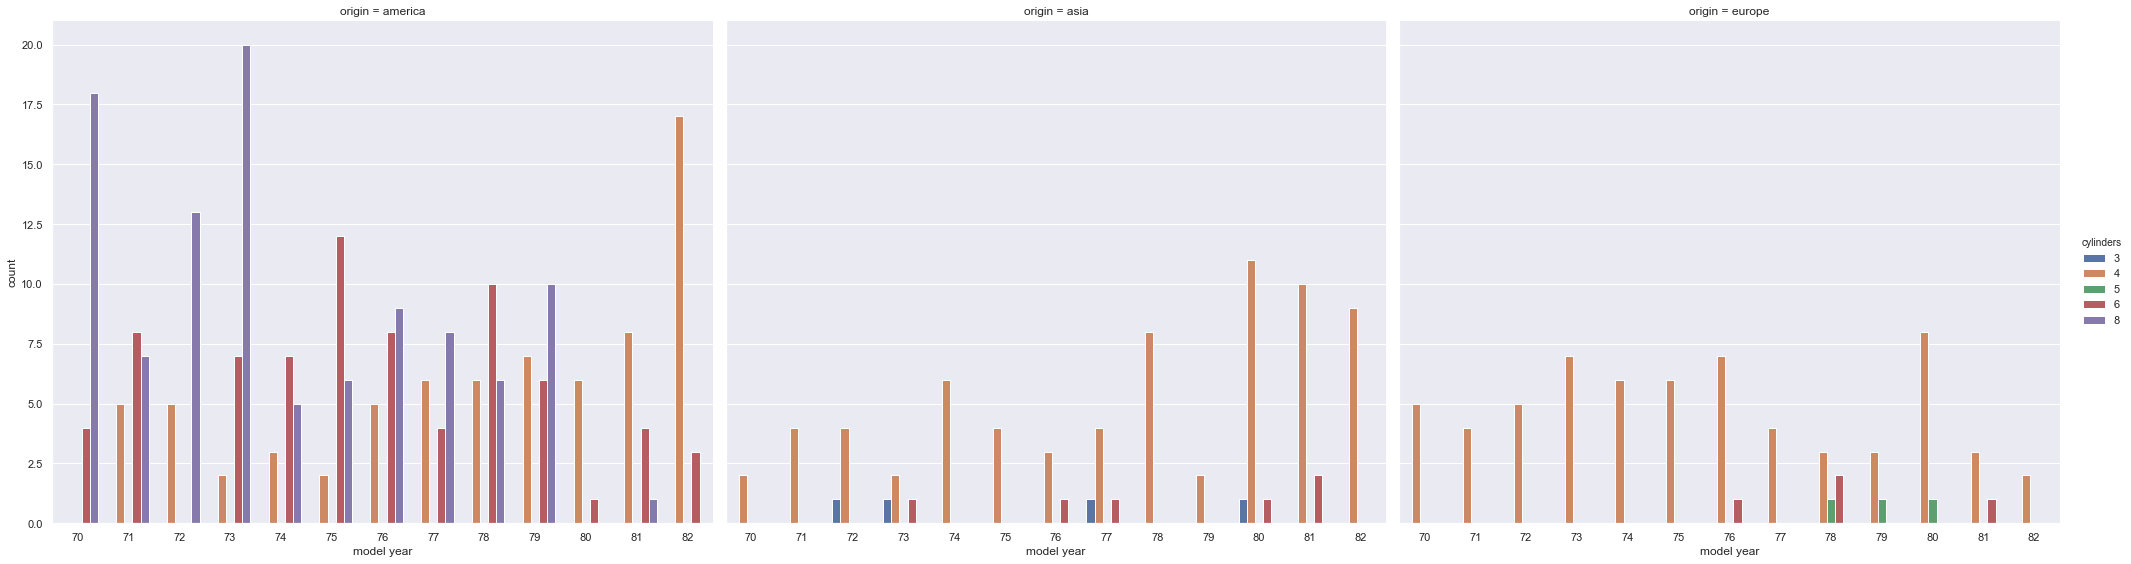

In [207]:
sns.catplot(x="model year", hue="cylinders", col="origin",
                data=mpg_df, kind="count",
               height=8, aspect=1.2);

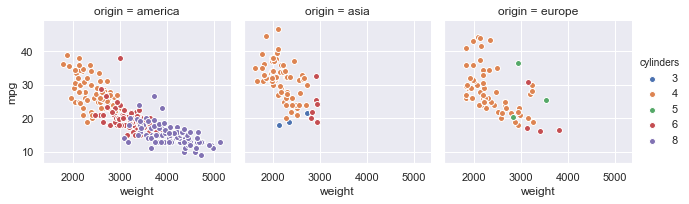

In [182]:
g = sns.FacetGrid(mpg_df, col="origin",  hue="cylinders")
g = (g.map(plt.scatter, "weight", "mpg", edgecolor="w")
      .add_legend())

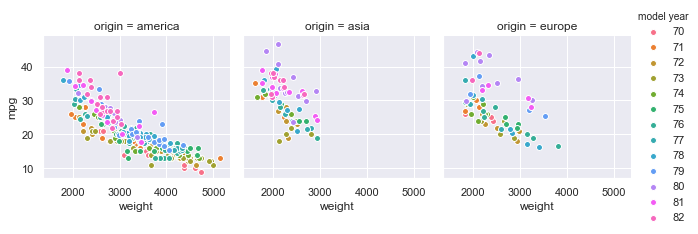

In [185]:
g = sns.FacetGrid(mpg_df, col="origin",  hue="model year")
g = (g.map(plt.scatter, "weight", "mpg", edgecolor="w")
      .add_legend())

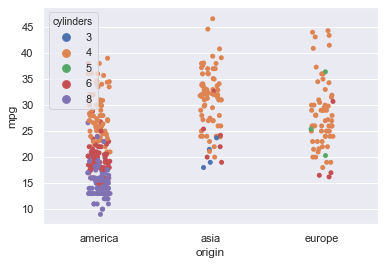

In [194]:
sns.stripplot(x = 'origin', y = 'mpg', hue='cylinders',data = mpg_df, jitter = True)
plt.show()

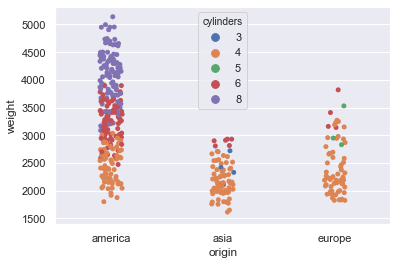

In [195]:
sns.stripplot(x = 'origin', y = 'weight', hue='cylinders', data = mpg_df, jitter = True)
plt.show()

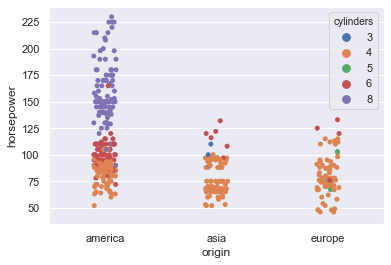

In [196]:
sns.stripplot(x = 'origin', y = 'horsepower', hue='cylinders', data = mpg_df, jitter = True)
plt.show()

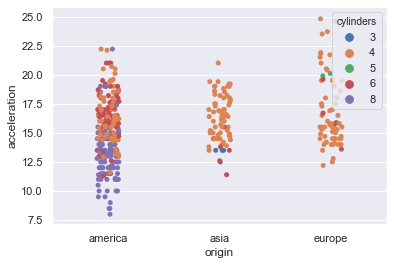

In [197]:
sns.stripplot(x = 'origin', y = 'acceleration', hue='cylinders', data = mpg_df, jitter = True)
plt.show()